Price information will be estimated using the data in the Housing.csv file. How can it be done? You can import .csv file to Python with Pandas library. You can change the yes/no columns to 1 or 0. In this way, when you make the data contain only numbers, you can predict the price information using other columns using Regression. You should use column 11 as input data (X) and price column as output data (y). For regression, RandomForestRegressor, DecisionTree, linear regression or Support Vector Regression from the sklearn library can be used.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("Housing.csv")
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no


In [3]:
for column in data.columns:
    if data[column].dtype == object:
        data[column] = data[column].str.replace('yes', '1').str.replace('no', '0')
    data.head()

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


y = data['price']
X = data.drop('price', axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

price_predict_1 = RandomForestRegressor(random_state=1)
price_predict_1.fit(train_X, train_y)
y_pred = price_predict_1.predict(val_X)
mape_1 = np.mean(np.abs((val_y - y_pred) / val_y)) * 100
print("Random Forest Regressor")
print("mape", mape_1)
print("mae ",mean_absolute_error(val_y, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R² score:", r2)



from sklearn.tree import DecisionTreeRegressor
train_X, X_test, train_y, y_test = train_test_split(X, y, random_state=2)
price_predict_2 = DecisionTreeRegressor()
price_predict_2.fit(train_X, train_y)
y_pred = price_predict_2.predict(X_test)
mape_2 = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Desicion Tree Regressor")
print("mape: ", mape_2)
print("mae: ",mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R² score:", r2)


from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

price_predict_3 = LinearRegression()
price_predict_3.fit(X_train, y_train)
y_pred = price_predict_3.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape_3 = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Linear Regression")
print("mape: ", mape_3)
print("mae:", mae)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R² score:", r2)


from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

price_predict_4 = SVR()
price_predict_4.fit(X_train, y_train)
y_pred = price_predict_4.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape_4 = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("SVR")
print("mape: ", mape_4)
print("mae:", mae)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R² score:", r2)



Random Forest Regressor
mape 20.699741645147775
mae  891537.7092457422
MSE: 5688668611803.564
R² score: -0.44761284428819015
Desicion Tree Regressor
mape:  24.99372827689956
mae:  1201604.501216545
MSE: 2851238793919.3022
R² score: 0.16948813783011885
Linear Regression
mape:  18.140780531553386
mae: 778470.0337443209
MSE: 1100168825118.5005
R² score: 0.6574630510539416
SVR
mape:  31.08519848490535
mae: 1443748.420507097
MSE: 4066206409324.9756
R² score: -0.034739941337446956


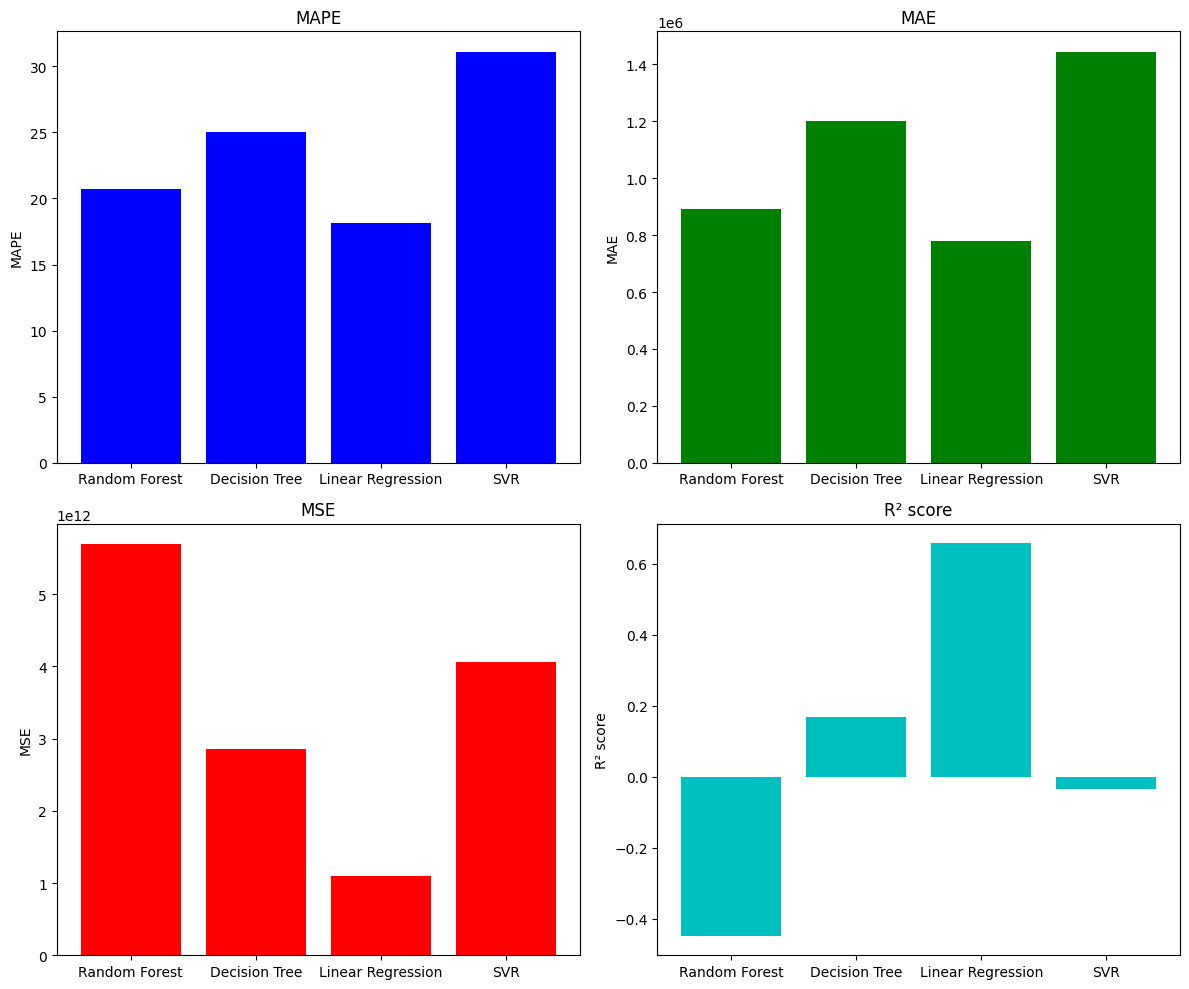

In [15]:
import matplotlib.pyplot as plt

# Mock values for demonstration (replace these with actual values from the models)
# Random Forest Regressor
mape_1 = 20.699741645147775
mae_1 = 891537.7092457422
mse_1 = 5688668611803.564
r2_1 = -0.44761284428819015

# Decision Tree Regressor
mape_2 = 24.99372827689956
mae_2 = 1201604.501216545
mse_2 = 2851238793919.3022
r2_2 = 0.16948813783011885

# Linear Regression
mape_3 = 18.140780531553386
mae_3 = 778470.0337443209
mse_3 = 1100168825118.5005
r2_3 = 0.6574630510539416

# SVR
mape_4 = 31.08519848490535
mae_4 = 1443748.420507097
mse_4 = 4066206409324.9756
r2_4 = -0.034739941337446956

# Aggregating values for plotting
mape_values = [mape_1, mape_2, mape_3, mape_4]
mae_values = [mae_1, mae_2, mae_3, mae_4]
mse_values = [mse_1, mse_2, mse_3, mse_4]
r2_values = [r2_1, r2_2, r2_3, r2_4]

models = ['Random Forest', 'Decision Tree', 'Linear Regression', 'SVR']

# Plotting MAPE
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.bar(models, mape_values, color='b')
plt.title('MAPE')
plt.ylabel('MAPE')

# Plotting MAE
plt.subplot(2, 2, 2)
plt.bar(models, mae_values, color='g')
plt.title('MAE')
plt.ylabel('MAE')

# Plotting MSE
plt.subplot(2, 2, 3)
plt.bar(models, mse_values, color='r')
plt.title('MSE')
plt.ylabel('MSE')

# Plotting R² score
plt.subplot(2, 2, 4)
plt.bar(models, r2_values, color='c')
plt.title('R² score')
plt.ylabel('R² score')

plt.tight_layout()
plt.show()
